# Final Project

Joy Wang, Stephanie Wang, Lucinda Zhou 

CMSC320

# Data Curation and Parsing

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import requests
from sklearn.cluster import KMeans
import statsmodels.api as OLS

In [2]:
# read in data and store as a dataframe
df = pd.read_csv('https://pandemicdatalake.blob.core.windows.net/public/curated/covid-19/covid_tracking/latest/covid_tracking.csv')

# remove deprecated columns based on data documentation
df = df.drop(df.columns[df.columns.str.contains('increase')], axis=1)
df = df.drop(labels=['date_checked','hospitalized','pos_neg','total'], axis=1)

df.head()

,date,state,positive,negative,pending,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,...,data_quality_grade,last_update_et,hash,death,total_test_results,fips,fips_code,iso_subdivision,load_time,iso_country
0,2021-03-07,AK,56886.0,NaN,NaN,33.0,1293.0,NaN,NaN,2.0,...,NaN,2021-03-05 03:59:00,dc4bccd4bb885349d7e94d6fed058e285d4be164,305.0,1731628.0,2,2,US-AK,2022-01-11 00:04:58,US
1,2021-03-07,AL,499819.0,1931711.0,NaN,494.0,45976.0,NaN,2676.0,NaN,...,NaN,2021-03-07 11:00:00,997207b430824ea40b8eb8506c19a93e07bc972e,10148.0,2323788.0,1,1,US-AL,2022-01-11 00:04:58,US
2,2021-03-07,AR,324818.0,2480716.0,NaN,335.0,14926.0,141.0,NaN,65.0,...,NaN,2021-03-07 00:00:00,50921aeefba3e30d31623aa495b47fb2ecc72fae,5319.0,2736442.0,5,5,US-AR,2022-01-11 00:04:58,US
3,2021-03-07,AS,0.0,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-12-01 00:00:00,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0.0,2140.0,60,60,US-AS,2022-01-11 00:04:58,US
4,2021-03-07,AZ,826454.0,3073010.0,NaN,963.0,57907.0,273.0,NaN,143.0,...,NaN,2021-03-07 00:00:00,0437a7a96f4471666f775e63e86923eb5cbd8cdf,16328.0,7908105.0,4,4,US-AZ,2022-01-11 00:04:58,US


For our final project, we decided to analyze the dataset from the COVID Tracking project, which is one of the open datasets from Microsoft. We utilized the CSV version of the dataset, and used pandas read_csv() to read and parse the csv file into a pandas dataframe. 

While reading Microsoft's documentation for this dataset, we noticed that some columns were described as "Deprecated", so we did some preliminary data cleaning by dropping those columns from the datafram using the drop() function.

# Joy's Work in Progress :))

In [3]:
# lin reg models
# USE MAX NOT MEAN SINCE EVERYTHING IS CUMMULATIVE
# standardize with population!!!!
# consider: how am i dealing with nan? by removing rows with nan values in the columns im modeling

# dropping unnecessary columns for my linear regression models
lrdata = df.drop(df.columns[df.columns.str.contains('cumulative|iso')], axis=1)
lrdata = lrdata.drop(labels=['pending','data_quality_grade','last_update_et','hash','fips','fips_code','load_time'], axis=1)
# remove NaN values
lrdata = lrdata.dropna(subset=['date','positive'])
lrdata

,date,state,positive,negative,hospitalized_currently,in_icu_currently,on_ventilator_currently,recovered,death,total_test_results
0,2021-03-07,AK,56886.0,NaN,33.0,NaN,2.0,NaN,305.0,1731628.0
1,2021-03-07,AL,499819.0,1931711.0,494.0,NaN,NaN,295690.0,10148.0,2323788.0
2,2021-03-07,AR,324818.0,2480716.0,335.0,141.0,65.0,315517.0,5319.0,2736442.0
3,2021-03-07,AS,0.0,2140.0,NaN,NaN,NaN,NaN,0.0,2140.0
4,2021-03-07,AZ,826454.0,3073010.0,963.0,273.0,143.0,NaN,16328.0,7908105.0
...,...,...,...,...,...,...,...,...,...,...
22255,2020-01-18,WA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22256,2020-01-17,WA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22257,2020-01-16,WA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22258,2020-01-15,WA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date', ylabel='Positive Cases'>

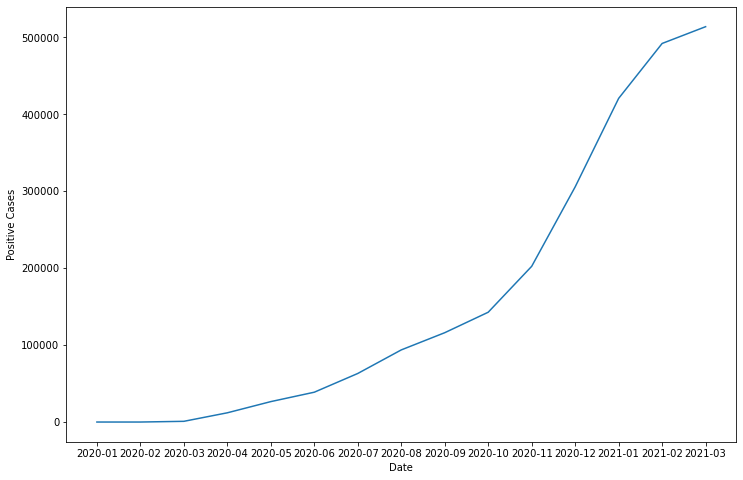

In [4]:
# getting a list with all unique states
# CAN WE ZONE IN ON WHAT STATES TO FOCUS ON???? cant do 56 so maybe red vs blue or particular states
states = lrdata['state'].unique()
# dates by months
dates = ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11',
         '2020-12','2021-01','2021-02','2021-03']

# graph positive test results across time
# create dataframe for monthly data
data_month = pd.DataFrame(columns=['date','positive'])
data_month['date'] = dates
for i in range(len(dates)):
    data_date = lrdata[lrdata.date.str.contains(dates[i])]
    average = data_date['positive'].mean()
    data_month.at[i, ('positive')] = average
fig, ax = plt.subplots()
ax.plot(data_month['date'], data_month['positive'])
ax.set_xlabel("Date")
ax.set_ylabel("Positive Cases")
fig.set_figwidth(12)
fig.set_figheight(8)
ax

In [5]:
# create new dataframe with averages for each state
state_avgs = pd.DataFrame(columns=['state', 'positive_avg','hospitalized_currently_avg','recovered_avg','death_avg'])
state_avgs['state'] = states

# calculating averages for each of these columns for each state
for column in ['positive','hospitalized_currently','recovered','death']:
    # dropping rows with NaN values in the current column we are operating on
    lrdata_col = lrdata.dropna(subset=[column])
    # there are 56 states, and we will iterate through them
    for i in range(56):
        # create a dataframe that only contains rows for the current state
        state = states[i]
        lrdata_state = lrdata_col[lrdata_col['state'] == states[i]]
        # calculate the average for this state and this column
        average = lrdata_state[column].mean()
        # insert the average value into the dataframe where we are storing averages for each state
        state_avgs.at[i, (column+'_avg')] = average
# remove NaN values for columns used in lin reg model
state_avgs = state_avgs.dropna(subset=['positive_avg','hospitalized_currently_avg','recovered_avg','death_avg'])
state_avgs = state_avgs.reset_index(drop=True)
# FINISHED CREATING THE AVGS TABLE!!!
state_avgs.head()

,state,positive_avg,hospitalized_currently_avg,recovered_avg,death_avg
0,AK,17298.2,54.9506,2153.11,88.4438
1,AL,169569,1160.32,109246,2900.18
2,AR,102514,535.738,97263.8,1713.85
3,CT,91853.6,610.456,8242.19,4476.46
4,DC,16440.4,182.65,11432.2,584.935


<AxesSubplot:title={'center':'Positive Cases vs. Currently Hospitalized'}, xlabel='Positive Cases', ylabel='Currently Hospitalized'>

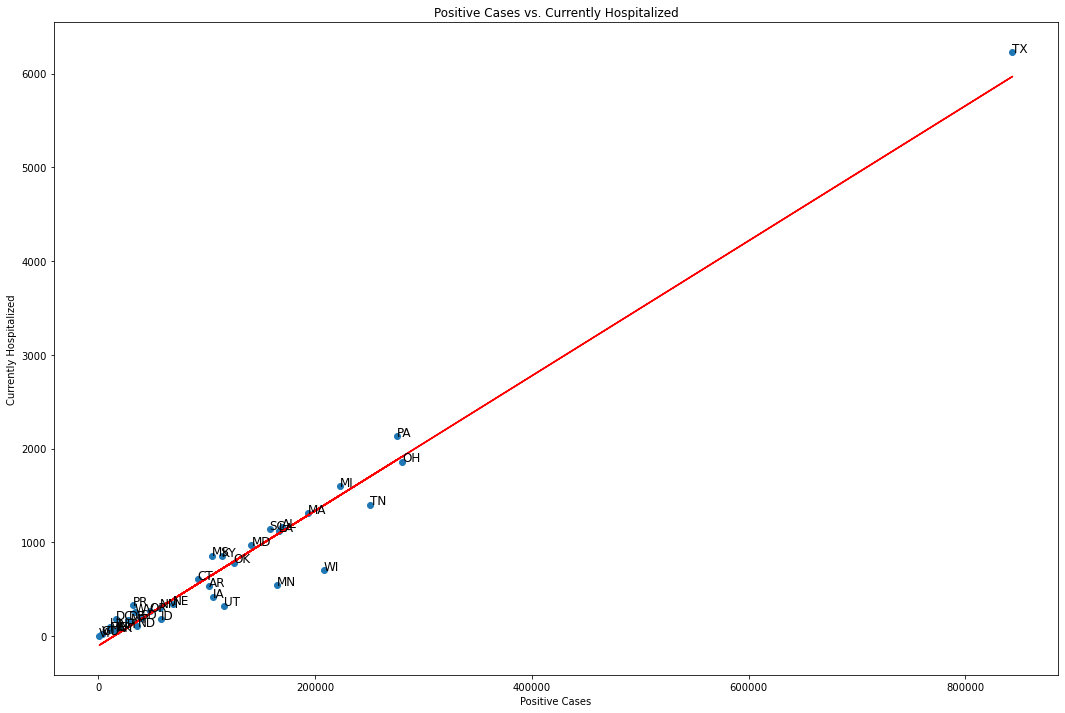

In [6]:
# lin reg for positive to hospitalization relationship
x = pd.to_numeric(state_avgs['positive_avg'])
y = pd.to_numeric(state_avgs['hospitalized_currently_avg'])
# create plot for positive to hospitalization relationship
fig, ax = plt.subplots()
ax.scatter(x,y)
for i, txt in enumerate(state_avgs.state):
    ax.annotate(txt, (x[i], y[i]), fontsize = 12)
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color="red")
ax.set_title("Positive Cases vs. Currently Hospitalized")
ax.set_xlabel("Positive Cases")
ax.set_ylabel("Currently Hospitalized")
fig.set_figwidth(18)
fig.set_figheight(12)
ax

<AxesSubplot:title={'center':'Positive Cases vs. Recovered'}, xlabel='Positive Cases', ylabel='Recovered'>

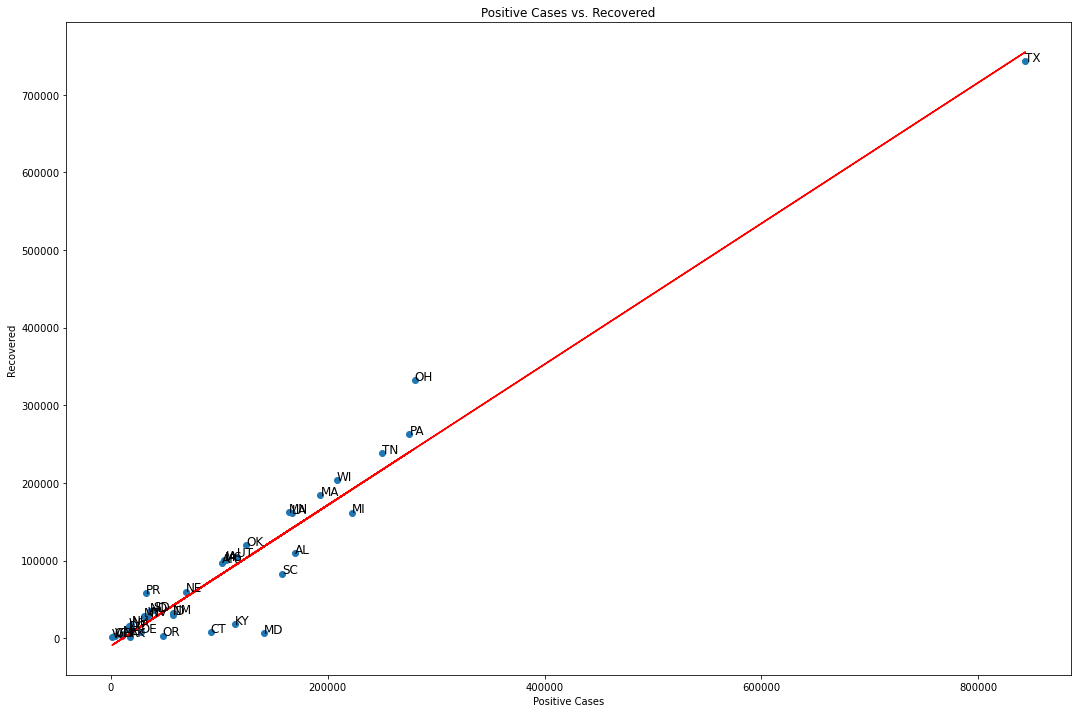

In [7]:
# lin reg for positive to recovered relationship
y = pd.to_numeric(state_avgs['recovered_avg'])
# create plot for positive to recovered relationship
fig, ax = plt.subplots()
ax.scatter(x,y)
for i, txt in enumerate(state_avgs.state):
    ax.annotate(txt, (x[i], y[i]), fontsize = 12)
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color="red")
ax.set_title("Positive Cases vs. Recovered")
ax.set_xlabel("Positive Cases")
ax.set_ylabel("Recovered")
fig.set_figwidth(18)
fig.set_figheight(12)
ax

<AxesSubplot:title={'center':'Positive Cases vs. Death'}, xlabel='Positive Cases', ylabel='Death'>

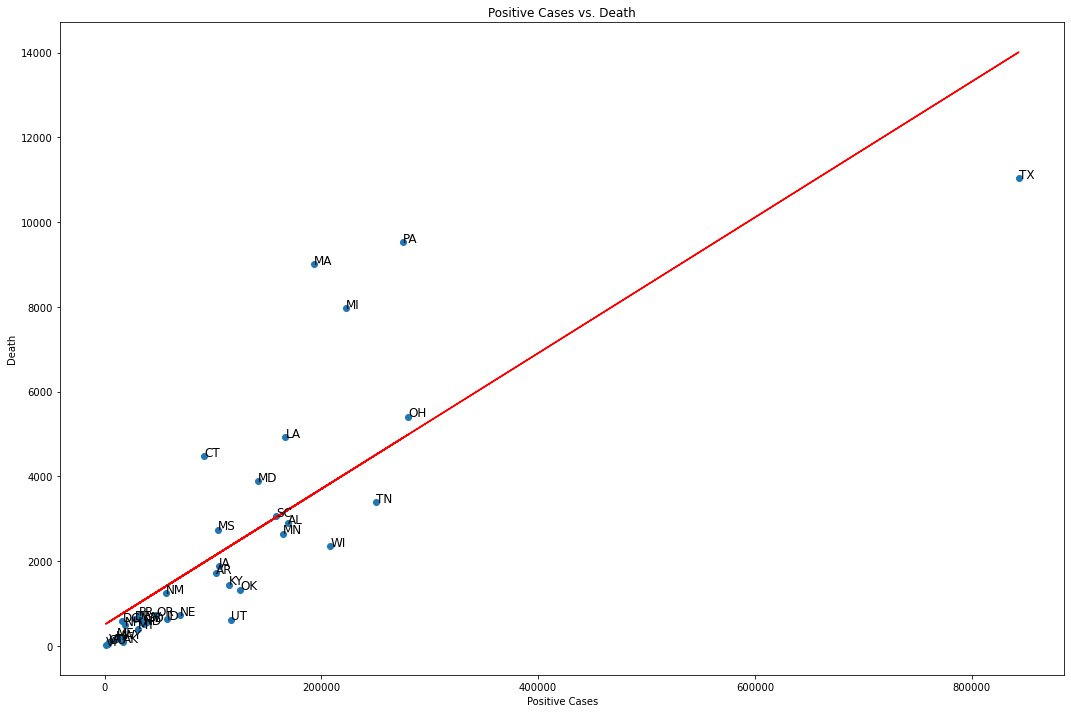

In [8]:
# lin reg for positive to death relationship
y = pd.to_numeric(state_avgs['death_avg'])
# create plot for positive to recovered relationship
fig, ax = plt.subplots()
ax.scatter(x,y)
for i, txt in enumerate(state_avgs.state):
    ax.annotate(txt, (x[i], y[i]), fontsize = 12)
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color="red")
ax.set_title("Positive Cases vs. Death")
ax.set_xlabel("Positive Cases")
ax.set_ylabel("Death")
fig.set_figwidth(18)
fig.set_figheight(12)
ax

As expected, there appears to be a linear relationship between positive cases and the numbers of people who are currently hospitalized. The states with their point above this line have more positive cases and less hospitalized than the lin reg model, meaning that they are doing well at mitigating hospitalization among positive cases in comparison to other states. These states include WI, MN, UT, TN, NC.

In [9]:
# see if there's a state that does consistently well
# ANALYSIS NEEDS TO BE DONE


# Stephanie's WIP

We can't do k means analysis on non numerical variables, so we can drop those. 

In [10]:
mldata = df.copy()
mldata = mldata.drop(
    labels=['data_quality_grade', 'last_update_et', 'hash', 'load_time', 'iso_subdivision', 'iso_country'], 
    axis=1
)
mldata.head()

,date,state,positive,negative,pending,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,recovered,death,total_test_results,fips,fips_code
0,2021-03-07,AK,56886.0,NaN,NaN,33.0,1293.0,NaN,NaN,2.0,NaN,NaN,305.0,1731628.0,2,2
1,2021-03-07,AL,499819.0,1931711.0,NaN,494.0,45976.0,NaN,2676.0,NaN,1515.0,295690.0,10148.0,2323788.0,1,1
2,2021-03-07,AR,324818.0,2480716.0,NaN,335.0,14926.0,141.0,NaN,65.0,1533.0,315517.0,5319.0,2736442.0,5,5
3,2021-03-07,AS,0.0,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2140.0,60,60
4,2021-03-07,AZ,826454.0,3073010.0,NaN,963.0,57907.0,273.0,NaN,143.0,NaN,NaN,16328.0,7908105.0,4,4


In [11]:
mldata = mldata.drop(
    labels=['date', 'hospitalized_currently', 'in_icu_currently', 'on_ventilator_currently', 'fips', 'fips_code'], 
    axis=1
)
mldata.head()

,state,positive,negative,pending,hospitalized_cumulative,in_icu_cumulative,on_ventilator_cumulative,recovered,death,total_test_results
0,AK,56886.0,NaN,NaN,1293.0,NaN,NaN,NaN,305.0,1731628.0
1,AL,499819.0,1931711.0,NaN,45976.0,2676.0,1515.0,295690.0,10148.0,2323788.0
2,AR,324818.0,2480716.0,NaN,14926.0,NaN,1533.0,315517.0,5319.0,2736442.0
3,AS,0.0,2140.0,NaN,NaN,NaN,NaN,NaN,0.0,2140.0
4,AZ,826454.0,3073010.0,NaN,57907.0,NaN,NaN,NaN,16328.0,7908105.0


Getting cumulative values for each column 

In [12]:
bystate = mldata.groupby('state').max()
bystate.head()

,positive,negative,pending,hospitalized_cumulative,in_icu_cumulative,on_ventilator_cumulative,recovered,death,total_test_results
state,,,,,,,,,
AK,56886.0,NaN,14.0,1293.0,NaN,NaN,7165.0,305.0,1731628.0
AL,499819.0,1931711.0,46.0,45976.0,2676.0,1515.0,295690.0,10149.0,2323788.0
AR,324818.0,2480716.0,203.0,14926.0,43.0,1533.0,315517.0,5417.0,2736442.0
AS,0.0,2140.0,17.0,NaN,NaN,NaN,NaN,0.0,2140.0
AZ,826454.0,3073010.0,130.0,57907.0,NaN,NaN,NaN,16328.0,7908105.0


Since we can't do K means clustering with NaN values, we'll just go ahead and drop the columns with NaN values. 

In [13]:
bystate = bystate.dropna(axis=1)
bystate.head()

,positive,death,total_test_results
state,,,
AK,56886.0,305.0,1731628.0
AL,499819.0,10149.0,2323788.0
AR,324818.0,5417.0,2736442.0
AS,0.0,0.0,2140.0
AZ,826454.0,16328.0,7908105.0


Note: I checked all the sources that this table uses; it's all from census.gov; however, there is no census.gov table that contains both states and territories, so it's easier to pull from the Wikipedia table with everything (instead of manually pulling from multiple pages for the territories)

In [14]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population')
populations = pd.read_html(r.text)[0]

# the end of the table has some total columns (which are unranked); we want to remove them 
populations = populations[~np.isnan(populations['Rank']['2021'])] 
# get rid of the citation brackets on the last four territories
for i in range(52, 56):
    row = populations.iloc[i]
    ind = row['State or territory']['State or territory'].find('[')
    populations.iat[i, 2] = row['State or territory']['State or territory'][0:ind]

abbreviations = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI",
    "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT",
    "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND",
    "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", 
    "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN",
    "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY", "Puerto Rico": "PR", 
    "District of Columbia": "DC", "Guam": "GU", "U.S. Virgin Islands": "VI", 
    "American Samoa": "AS", "Northern Mariana Islands": "MP"
}

populations['Abbreviation'] = populations.apply(lambda r: abbreviations[r['State or territory']['State or territory']], axis=1)

populations.head()

Rank      State or territory Census population[7][a]                \
  2021 2010 State or territory            July 1, 2021 April 1, 2010   
0  1.0  1.0         California                39237836      37253956   
1  2.0  2.0              Texas                29527941      25145561   
2  3.0  4.0            Florida                21781128      18801310   
3  4.0  3.0           New York                19835913      19378102   
4  5.0  6.0       Pennsylvania                12964056      12702379   

  Change,2010–2021[7][a]          House of Reps.[b]          \
                       %     Abs.                S.       %   
0                   5.3%  1983880                52  11.95%   
1                  17.4%  4382380                38   8.74%   
2                 15.85%  2979818                28   6.44%   
3                  2.36%   457811                26   5.98%   
4                  2.06%   261677                17   3.91%   

  Pop. per elec. vote, 2020[c] Census pop. per seat          \
  Pop. per elec. vote, 2020[c]                 2020    2010   
0                       715783               761091  702905   
1                       772652               767981  698488   
2                       749425               770376  696345   
3                       666785               777529  717707   
4                       639163               765403  705688   

  % of the total U.S. pop.[d]                      % of Elec. Coll.  \
                    Est. 2020    2010 Ch.2010–2020 % of Elec. Coll.   
0                      11.80%  11.91%       –0.11%           10.04%   
1                       8.70%   8.04%        0.66%            7.43%   
2                       6.43%   6.01%        0.42%            5.58%   
3                       6.03%   6.19%       –0.17%            5.20%   
4                       3.88%   4.06%       –0.18%            3.53%   

  Abbreviation  
                
0           CA  
1           TX  
2           FL  
3           NY  
4           PA

We want to divide by population in order to get rates per capita (for more accurate results). Our cumulative numbers are from 2021, so we'll use 2021 populations.

In [15]:
bystate['population'] = bystate.apply(
    lambda r: populations[populations['Abbreviation'] == r.name]['Census population[7][a]']['July 1, 2021'].values[0],
    axis = 1
)
bystate.head()

,positive,death,total_test_results,population
state,,,,
AK,56886.0,305.0,1731628.0,733391
AL,499819.0,10149.0,2323788.0,5039877
AR,324818.0,5417.0,2736442.0,3011524
AS,0.0,0.0,2140.0,49710
AZ,826454.0,16328.0,7908105.0,7276316


In [16]:
percapita = bystate.copy()
percapita['positive'] = bystate['positive'] / bystate['population']
percapita['death'] = bystate['death'] / bystate['population']
percapita['total_test_results'] = bystate['total_test_results'] / bystate['population']
percapita = percapita.drop(labels='population', axis=1)
percapita.head()

,positive,death,total_test_results
state,,,
AK,0.077566,0.000416,2.361125
AL,0.099173,0.002014,0.461080
AR,0.107858,0.001799,0.908657
AS,0.000000,0.000000,0.043050
AZ,0.113581,0.002244,1.086828


In [17]:
X = percapita.values

km = KMeans(n_clusters=2, init='k-means++')
y = km.fit_predict(X)
y

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

# Lucinda's WIP
We will also be looking to see if there is any correlation between the political leaning of each state and positive/death rates.

In [18]:
# group by state and sum up totals
sum = lrdata.groupby("state").sum()

# drop territories since don't have political data on those
sum = sum.drop(index=['AS','GU', 'MP', 'PR','VI','DC'])

print(sum.count())
sum

positive                   50
negative                   50
hospitalized_currently     50
in_icu_currently           50
on_ventilator_currently    50
recovered                  50
death                      50
total_test_results         50
dtype: int64


,positive,negative,hospitalized_currently,in_icu_currently,on_ventilator_currently,recovered,death,total_test_results
state,,,,,,,,
AK,6158147.0,0.000000e+00,17804.0,0.0,2101.0,482296.0,31486.0,2.082170e+08
AL,62062326.0,3.145741e+08,404951.0,0.0,0.0,31681269.0,1038264.0,3.662777e+08
AR,37622536.0,3.363102e+08,188044.0,52440.0,34700.0,33847806.0,601561.0,3.685376e+08
AZ,95464371.0,4.379830e+08,640831.0,172806.0,112235.0,0.0,1918434.0,9.190266e+08
CA,379100459.0,3.457932e+06,2653612.0,668693.0,0.0,0.0,3470484.0,5.833385e+09
CO,49413695.0,3.200637e+08,231196.0,0.0,0.0,0.0,908462.0,7.034087e+08
CT,33618419.0,0.000000e+00,214270.0,0.0,0.0,1491836.0,1584666.0,7.782719e+08
DE,10219638.0,8.746894e+07,61269.0,6818.0,0.0,2034628.0,228375.0,1.745888e+08
FL,246537443.0,1.484857e+09,1149908.0,0.0,0.0,0.0,4471991.0,2.886547e+09


We will now need data on the political leanings of each state. Since the pandemic occured during the 2020 election, data from this election will be the most interesting to analyze. We found this Kaggle dataset that contains information about the number of votes broken down to each county:
https://www.kaggle.com/datasets/unanimad/us-election-2020?resource=download&select=president_county_candidate.csv

In [19]:
# read table
elections = pd.read_csv("president_county_candidate.csv")

# group table by state and party, remove DC
filtered = elections[elections["party"] == "DEM"]
grouped = filtered.groupby(["state", "party"]).sum()
grouped = grouped.drop(index=["District of Columbia"])

# get totals
total = elections.groupby("state").sum()
total = total.drop(index=["District of Columbia"])

# loop through and get democratic percentage
for index, row in grouped.iterrows():
    total.at[index[0],"dem_pct"] = row["total_votes"]/total["total_votes"][index[0]]

    
# change to state abbreviations instead of full names
total["stateID"] = ["AL", "AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]
total = total.set_index("stateID")
total



,total_votes,won,dem_pct
stateID,,,
AL,2323304,67,0.365707
AK,391346,40,0.391993
AZ,3387326,15,0.493647
AR,1219069,75,0.347751
CA,17495906,58,0.634992
CO,3256953,64,0.554000
CT,1824280,169,0.592387
DE,504010,3,0.587822
FL,11067456,67,0.478615


## TODO: Merge with COVID dataframe, plot stuff, see if any patterns